In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('covid.results.deterministic.csv',sep='\t')

dfD = pd.read_csv('covid_19_manual.csv')

In [82]:
cum_infected = np.zeros(len(df['infectious']))
infectious = df['infectious']
dead = df['dead']
recovered = df['recovered']

cum_infected[0] = infectious[0]
cum_infected[1] = infectious[1]
cum_i = cum_infected[1]

for i in range(2,len(cum_infected)):
    delta_infect = infectious[i] - infectious[i-1]
    delta_recovered = recovered[i-1] - recovered[i-2]
    delta_dead = dead[i-1] - dead[i-2]
    new_infect =  delta_infect + delta_recovered + delta_dead
    cum_i = cum_i + new_infect
    cum_infected[i] = cum_i

      Province/State Country/Region     Date  Confirmed  Deaths  Recovered
11               NaN        Germany  1/22/20          0       0          0
297              NaN        Germany  1/23/20          0       0          0
583              NaN        Germany  1/24/20          0       0          0
869              NaN        Germany  1/25/20          0       0          0
1155             NaN        Germany  1/26/20          0       0          0
1441             NaN        Germany  1/27/20          1       0          0
1727             NaN        Germany  1/28/20          4       0          0
2013             NaN        Germany  1/29/20          4       0          0
2299             NaN        Germany  1/30/20          4       0          0
2585             NaN        Germany  1/31/20          5       0          0
2871             NaN        Germany   2/1/20          8       0          0
3157             NaN        Germany   2/2/20         10       0          0
3443             NaN     

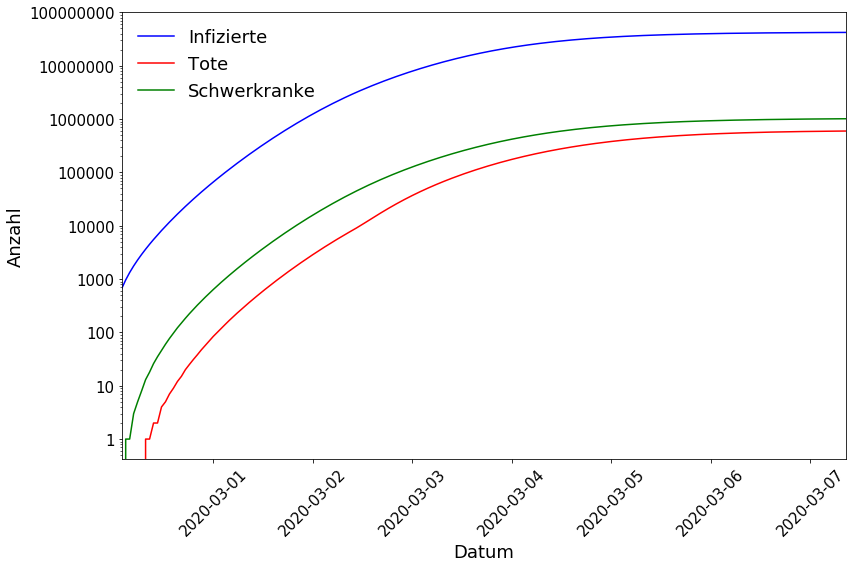

In [86]:
x = range(0,len(df['infectious']))

fig, ax =  plt.subplots(1,1, figsize=(12.0,8.0))

ax.plot(x,cum_infected, color = 'b',label = 'Infizierte')
ax.plot(x,df['dead'], color = 'r', label = 'Tote')
ax.plot(x,df['intensive'], color = 'g', label = 'Schwerkranke')


data = dfD[dfD['Country/Region'] == 'Germany']
print(data)
#ax.plot('Date', 'Confirmed', color = 'g', label = 'Schwerkranke')




ax.set_yscale('log')

ax.set_xlim(2,len(dead)-1)
ax.set_xticklabels(df['time'],rotation=45,fontsize=15)



ax.set_yticklabels([int(x) for x in ax.get_yticks()],fontsize=15)

ax.set_xlabel('Datum',fontsize=18)
ax.set_ylabel('Anzahl',fontsize=18)

ax.legend(loc='best',fontsize=18.0,numpoints=1, frameon=False)

fig.tight_layout()